In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [383]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.local/lib/python3.5/site-packages


In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [381]:
!pip freeze | grep scikit-learn

scikit-learn==0.19.1


In [5]:
!pip install --upgrade beautifulsoup4

Requirement already up-to-date: beautifulsoup4 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.local/lib/python3.5/site-packages


In [79]:
from bs4 import BeautifulSoup #pip install beautifulsoup4
import requests
import re

In [93]:
from IPython.display import display
pd.set_option('display.max_colwidth', -1)

In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question to be answered: Gender classification of the characters
## reference http://jonreeve.com/2015/03/imperial-voices/
http://cs229.stanford.edu/proj2013/Olson-DeterminingTheGenderOfShakespearesCharacters.pdf
https://github.com/JonathanReeve/shakespeare-dialog-extractor
http://www.exegetic.biz/blog/2013/09/text-mining-the-complete-works-of-william-shakespeare/
http://www.exegetic.biz/blog/2013/09/clustering-the-words-of-william-shakespeare/
https://gist.github.com/benmarwick/8763991
https://clarkdatalabs.github.io/soms/SOM_Shakespeare_Part_1
https://technowiki.wordpress.com/2011/08/27/latent-semantic-analysis-lsa-tutorial/

# Scraping - Shakespeare

In [82]:
url = 'http://www.shakespeareswords.com/Special-Features-male-Characters'
main_page=requests.get(url)
soup = BeautifulSoup(main_page.text, "html.parser")

In [83]:
# this function is to retrieve the list of male and female speakers in Shakespeare plays
# the male character's url is 'http://www.shakespeareswords.com/Special-Features-male-Characters'
# the female character's url is 'http://www.shakespeareswords.com/Special-Features-Female-Characters'

def retrieve_speaker_list(url):
    main_page=requests.get(url)
    soup = BeautifulSoup(main_page.text, "html.parser")
    content_table = soup.find(id = "ctl00_ContentContent_GridView2")
    len(content_table)
    rows = content_table.findChildren(['tr'])
    print(rows[1])

    # parse out all male characters into the table
    col_names = ['speaker', 'play', 'sex','lines']
    n_rows = len(rows)
    df = pd.DataFrame(columns = col_names,
                                  index= range(0,n_rows))


    row_index = 0
    for row in rows:
        cells = row.findChildren('td')
        col_index = 0
        for cell in cells:
            df.iat[row_index,col_index] = cell.get_text()
            col_index +=1
        row_index +=1

    return df.iloc[1:,:]   

In [84]:
df_male = retrieve_speaker_list('http://www.shakespeareswords.com/Special-Features-male-Characters')
df_male

<tr style="background-color:#F6F6F6;">
<td>HAMLET</td><td>Hamlet</td><td>Male</td><td>1506</td>
</tr>


,speaker,play,sex,lines
1,HAMLET,Hamlet,Male,1506
2,IAGO,Othello,Male,1088
3,KING HENRY,Henry V,Male,1031
4,OTHELLO,Othello,Male,880
5,TIMON,Timon of Athens,Male,850
6,DUKE,Measure for Measure,Male,847
7,ANTONY,Antony and Cleopatra,Male,839
8,LEAR,King Lear,Male,749
9,KING EDWARD,King Edward III,Male,748
10,BRUTUS,Julius Caesar,Male,722


In [85]:
df_female = retrieve_speaker_list('http://www.shakespeareswords.com/Special-Features-Female-Characters')
df_female

<tr style="background-color:#F6F6F6;">
<td>ROSALIND</td><td>As You Like It</td><td>Female</td><td>685</td>
</tr>


,speaker,play,sex,lines
1,ROSALIND,As You Like It,Female,685
2,CLEOPATRA,Antony and Cleopatra,Female,678
3,INNOGEN,Cymbeline,Female,594
4,PORTIA,The Merchant of Venice,Female,574
5,JULIET,Romeo and Juliet,Female,542
6,HELENA,All's Well That Ends Well,Female,478
7,ISABELLA,Measure for Measure,Female,424
8,DESDEMONA,Othello,Female,391
9,EMILIA,The Two Noble Kinsmen,Female,374
10,VIOLA,Twelfth Night,Female,335


{'boxes': [<matplotlib.lines.Line2D at 0x7f73d321c2e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f73d390f9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f73d345f0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f73d2df84e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f73d321cdd8>,
  <matplotlib.lines.Line2D at 0x7f73d34da320>]}

{'boxes': [<matplotlib.lines.Line2D at 0x7f73d2ffd160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f73d34869b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f73e01078d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f73d3333390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f73d2ffde10>,
  <matplotlib.lines.Line2D at 0x7f73d337a9e8>]}

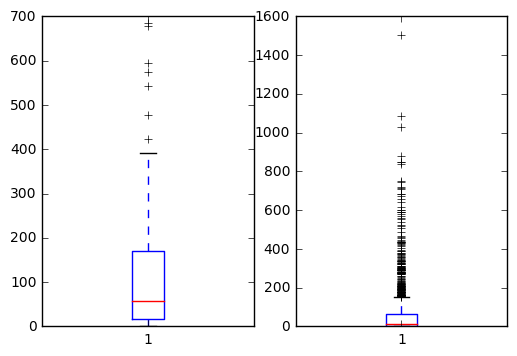

In [796]:
# start exploring data
import matplotlib.gridspec as gridspec

fig = plt.figure() 
# create figure window

gs = gridspec.GridSpec(1,2)
# Creates grid 'gs' of a rows and b columns 


#ax = plt.subplot(gs[x, y])
# Adds subplot 'ax' in grid 'gs' at position [x,y]

ax1 = plt.subplot(gs[0,0]) # row 0 (top) spans all(3) columns
ax1.boxplot(np.array(df_female.lines))
#ax.set_ylabel('') #Add y-axis label 'Foo' to graph 'ax' (xlabel for x-axis)

ax2 = plt.subplot(gs[0,1]) # row 0 (top) spans all(3) columns
ax2.boxplot(np.array(df_male.lines))

fig.add_subplot(ax1) #add 'ax' to figure
fig.add_subplot(ax2) #add 'ax' to figure


In [87]:
# prune the characters only consider ones which have more than 10 lines
df_female.lines = pd.to_numeric(df_female.lines, errors='coerce')
df_f_prune = df_female.loc[df_female.lines > 10]
df_f_prune.shape
play_list = df_f_prune['play'].unique()
print('we look into {} number of plays, including {}'.format(len(play_list), play_list))

# The .size() built-in method of DataFrameGroupBy objects actually returns a Series object with the group sizes and not a DataFrame
df_limit_size  = df_f_prune.groupby(['play']).size().to_frame('size')
df_limit_size
#df_limit_lines  = df_f_prune.iloc[df_f_prune.groupby(['play'], as_index=False).apply(lambda x: x['lines'].idxmax())]
# find the index of maximum speaker's lines for each play
print(df_f_prune.groupby(['play']).apply(lambda x: x['lines'].idxmax()))
df_limit_lines  = df_f_prune.loc[df_f_prune.groupby(['play']).apply(lambda x: x['lines'].idxmax())]
df_limit_lines
df_limit_lines = df_limit_lines.reset_index(drop  = True).set_index('play').sort_index()
df_limit_lines



(140, 4)

we look into 38 number of plays, including ['As You Like It' 'Antony and Cleopatra' 'Cymbeline'
 'The Merchant of Venice' 'Romeo and Juliet' "All's Well That Ends Well"
 'Measure for Measure' 'Othello' 'The Two Noble Kinsmen' 'Twelfth Night'
 "The Winter's Tale" 'The Merry Wives of Windsor'
 'The Two Gentlemen of Verona' 'Henry VI Part 2' 'Coriolanus'
 'Troilus and Cressida' "Love's Labour's Lost" 'Much Ado About Nothing'
 'Henry VI Part 3' 'Richard III' 'King John' 'The Comedy of Errors'
 'Henry VIII' 'Macbeth' 'Titus Andronicus' 'Henry VI Part 1'
 "A Midsummer Night's Dream" 'The Taming of the Shrew' 'King Edward III'
 'King Lear' 'Pericles' 'Hamlet' 'Henry IV Part 2' 'The Tempest'
 'Richard II' 'Julius Caesar' 'Henry V' 'Henry IV Part 1']


,size
play,
A Midsummer Night's Dream,4
All's Well That Ends Well,5
Antony and Cleopatra,4
As You Like It,4
Coriolanus,3
Cymbeline,4
Hamlet,2
Henry IV Part 1,2
Henry IV Part 2,3


play
A Midsummer Night's Dream      34
All's Well That Ends Well      6 
Antony and Cleopatra           2 
As You Like It                 1 
Coriolanus                     17
Cymbeline                      3 
Hamlet                         43
Henry IV Part 1                89
Henry IV Part 2                44
Henry V                        84
Henry VI Part 1                31
Henry VI Part 2                15
Henry VI Part 3                23
Henry VIII                     28
Julius Caesar                  68
King Edward III                37
King John                      26
King Lear                      39
Love's Labour's Lost           20
Macbeth                        29
Measure for Measure            7 
Much Ado About Nothing         22
Othello                        8 
Pericles                       42
Richard II                     62
Richard III                    25
Romeo and Juliet               5 
The Comedy of Errors           27
The Merchant of Venice         4 
The Merry

,speaker,play,sex,lines
34,HELENA,A Midsummer Night's Dream,Female,230
6,HELENA,All's Well That Ends Well,Female,478
2,CLEOPATRA,Antony and Cleopatra,Female,678
1,ROSALIND,As You Like It,Female,685
17,VOLUMNIA,Coriolanus,Female,311
3,INNOGEN,Cymbeline,Female,594
43,OPHELIA,Hamlet,Female,173
89,LADY PERCY,Henry IV Part 1,Female,57
44,HOSTESS,Henry IV Part 2,Female,171
84,KATHERINE,Henry V,Female,61


,speaker,sex,lines
play,,,
A Midsummer Night's Dream,HELENA,Female,230
All's Well That Ends Well,HELENA,Female,478
Antony and Cleopatra,CLEOPATRA,Female,678
As You Like It,ROSALIND,Female,685
Coriolanus,VOLUMNIA,Female,311
Cymbeline,INNOGEN,Female,594
Hamlet,OPHELIA,Female,173
Henry IV Part 1,LADY PERCY,Female,57
Henry IV Part 2,HOSTESS,Female,171


In [88]:
df_f_prune.head(5)
limit_index = df_f_prune.groupby(['play']).apply(lambda x: x['lines'].idxmax())
df1 = df_f_prune.groupby('play')['lines'].agg(['max', 'idxmax'])
df1.columns = ['lines_max', 'max_index']
print(df1.head(10)) 
df_f_prune.loc[limit_index]
#print (stocks.join(df1, on='week_id'))

,speaker,play,sex,lines
1,ROSALIND,As You Like It,Female,685
2,CLEOPATRA,Antony and Cleopatra,Female,678
3,INNOGEN,Cymbeline,Female,594
4,PORTIA,The Merchant of Venice,Female,574
5,JULIET,Romeo and Juliet,Female,542


                           lines_max  max_index
play                                           
A Midsummer Night's Dream  230        34       
All's Well That Ends Well  478        6        
Antony and Cleopatra       678        2        
As You Like It             685        1        
Coriolanus                 311        17       
Cymbeline                  594        3        
Hamlet                     173        43       
Henry IV Part 1            57         89       
Henry IV Part 2            171        44       
Henry V                    61         84       


,speaker,play,sex,lines
34,HELENA,A Midsummer Night's Dream,Female,230
6,HELENA,All's Well That Ends Well,Female,478
2,CLEOPATRA,Antony and Cleopatra,Female,678
1,ROSALIND,As You Like It,Female,685
17,VOLUMNIA,Coriolanus,Female,311
3,INNOGEN,Cymbeline,Female,594
43,OPHELIA,Hamlet,Female,173
89,LADY PERCY,Henry IV Part 1,Female,57
44,HOSTESS,Henry IV Part 2,Female,171
84,KATHERINE,Henry V,Female,61


In [89]:
# we prune the male character list by using the following rules
# rule 1: at least 10 line of speeches
# rule 2: pick same number of male speakers as female speaker in the same play
# rule 3: restricted males to those not longer than the longest female character from that particular play

df_male.lines = pd.to_numeric(df_male.lines, errors='coerce')
df_m_prune = df_male.loc[df_male.lines > 10]
df_m_prune.shape
m_play_list = df_m_prune['play'].unique()
print('we look into {} number of plays, including {}'.format(len(m_play_list), m_play_list))
df_m_prune.groupby(['play']).size()

# we need to go through df_limit_lines and cut off speakers which is over upper limit of female lines
for play in df_limit_lines.index:
    upper_limit = df_limit_lines.loc[play]['lines']
    #print(upper_limit)
    df_m_prune.drop(df_m_prune[(df_m_prune.play == play) & (df_m_prune.lines > upper_limit)].index, inplace = True)
#df_m_prune.groupby(['play','speaker','lines']).size()
df_m_prune.sort_values('lines').groupby(['play','speaker','lines']).size()


(794, 4)

we look into 39 number of plays, including ['Hamlet' 'Othello' 'Henry V' 'Timon of Athens' 'Measure for Measure'
 'Antony and Cleopatra' 'King Lear' 'King Edward III' 'Julius Caesar'
 'Macbeth' 'Titus Andronicus' "The Winter's Tale" 'Richard III'
 'Coriolanus' 'The Tempest' 'Henry IV Part 2' 'Romeo and Juliet'
 'Henry IV Part 1' 'Pericles' 'The Two Noble Kinsmen'
 "Love's Labour's Lost" 'The Taming of the Shrew' 'Troilus and Cressida'
 'King John' 'Richard II' 'Henry VIII' 'The Two Gentlemen of Verona'
 'Cymbeline' 'The Merry Wives of Windsor' 'Henry VI Part 3'
 'Much Ado About Nothing' 'Henry VI Part 1' "All's Well That Ends Well"
 'Henry VI Part 2' 'The Merchant of Venice' 'Twelfth Night'
 'As You Like It' 'The Comedy of Errors' "A Midsummer Night's Dream"]


play
A Midsummer Night's Dream      15
All's Well That Ends Well      11
Antony and Cleopatra           32
As You Like It                 18
Coriolanus                     30
Cymbeline                      23
Hamlet                         22
Henry IV Part 1                21
Henry IV Part 2                30
Henry V                        28
Henry VI Part 1                28
Henry VI Part 2                31
Henry VI Part 3                24
Henry VIII                     25
Julius Caesar                  27
King Edward III                23
King John                      17
King Lear                      16
Love's Labour's Lost           13
Macbeth                        20
Measure for Measure            14
Much Ado About Nothing         16
Othello                        14
Pericles                       18
Richard II                     24
Richard III                    26
Romeo and Juliet               19
The Comedy of Errors           13
The Merchant of Venice         15
The Merry

/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


play                       speaker        lines
A Midsummer Night's Dream  CHORUS         14       1
                           DEMETRIUS      136      1
                           EGEUS          41       1
                           FAIRY          28       1
                           FLUTE          57       1
                           LYSANDER       179      1
                           OBERON         225      1
                           PHILOSTRATE    24       1
                           PUCK           206      1
                           QUINCE         121      1
                           SNOUT          22       1
                           SNUG           14       1
                           STARVELING     11       1
All's Well That Ends Well  BERTRAM        277      1
                           CLOWN          195      1
                           DUKE           19       1
                           FIRST LORD     173      1
                           FIRST SOLDIER  82       

In [90]:
import random
for play in df_limit_size.index:
    upper_limit = df_limit_size.loc[play]['size']
    x = df_m_prune[(df_m_prune.play == play) ].index
    print(df_m_prune[(df_m_prune.play == play) ])
    print(x)
    drop_x = random.sample(list(x), len(x) - upper_limit)
    print(drop_x)
    
    df_m_prune.drop(drop_x, inplace = True)
#df_m_prune.groupby(['play','speaker','lines']).size()
df_m_prune.sort_values('lines').groupby(['play','speaker','lines']).size()

         speaker                       play   sex  lines
120  OBERON       A Midsummer Night's Dream  Male  225  
136  PUCK         A Midsummer Night's Dream  Male  206  
162  LYSANDER     A Midsummer Night's Dream  Male  179  
212  DEMETRIUS    A Midsummer Night's Dream  Male  136  
227  QUINCE       A Midsummer Night's Dream  Male  121  
362  FLUTE        A Midsummer Night's Dream  Male  57   
430  EGEUS        A Midsummer Night's Dream  Male  41   
529  FAIRY        A Midsummer Night's Dream  Male  28   
567  PHILOSTRATE  A Midsummer Night's Dream  Male  24   
582  SNOUT        A Midsummer Night's Dream  Male  22   
710  SNUG         A Midsummer Night's Dream  Male  14   
711  CHORUS       A Midsummer Night's Dream  Male  14   
777  STARVELING   A Midsummer Night's Dream  Male  11   
Int64Index([120, 136, 162, 212, 227, 362, 430, 529, 567, 582, 710, 711, 777], dtype='int64')
[582, 777, 710, 430, 136, 212, 120, 362, 227]
           speaker                       play   sex  lines
51  

/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[352, 104, 375, 741, 697, 445, 444, 792, 540, 81, 279, 701, 129, 453, 504, 742, 626, 700, 604, 732, 664, 113, 426, 605, 370]
              speaker       play   sex  lines
37   POSTHUMUS         Cymbeline  Male  442  
43   IACHIMO           Cymbeline  Male  430  
66   BELARIUS          Cymbeline  Male  336  
93   CYMBELINE         Cymbeline  Male  290  
109  CLOTEN            Cymbeline  Male  260  
125  PISANIO           Cymbeline  Male  217  
174  GUIDERIUS         Cymbeline  Male  164  
207  ARVIRAGUS         Cymbeline  Male  138  
258  LUCIUS            Cymbeline  Male  104  
309  CORNELIUS         Cymbeline  Male  73   
330  FIRST GENTLEMAN   Cymbeline  Male  66   
398  SECOND LORD       Cymbeline  Male  46   
408  FIRST GAOLER      Cymbeline  Male  45   
416  PHILARIO          Cymbeline  Male  43   
417  SOOTHSAYER        Cymbeline  Male  43   
419  FIRST LORD        Cymbeline  Male  42   
433  SICILIUS          Cymbeline  Male  40   
585  FRENCHMAN         Cymbeline  Male  22   
5

[294, 346, 371, 477, 131, 278, 360, 382, 464, 250, 323, 781, 285, 443, 275, 402, 148, 194]
               speaker           play   sex  lines
394  OCTAVIUS           Julius Caesar  Male  47   
413  DECIUS             Julius Caesar  Male  44   
440  MESSALA            Julius Caesar  Male  38   
468  LUCIUS             Julius Caesar  Male  33   
497  MARULLUS           Julius Caesar  Male  31   
498  TITINIUS           Julius Caesar  Male  31   
509  LUCILIUS           Julius Caesar  Male  30   
537  FLAVIUS            Julius Caesar  Male  27   
550  SECOND PLEBEIAN    Julius Caesar  Male  25   
570  THIRD PLEBEIAN     Julius Caesar  Male  23   
581  FOURTH PLEBEIAN    Julius Caesar  Male  22   
594  FIRST PLEBEIAN     Julius Caesar  Male  21   
610  SERVANT OF ANTONY  Julius Caesar  Male  20   
622  ARTEMIDORUS        Julius Caesar  Male  19   
633  SOOTHSAYER         Julius Caesar  Male  18   
634  CINNA              Julius Caesar  Male  18   
658  METELLUS           Julius Caesar  Mal

                speaker        play   sex  lines
284  KING HENRY          Richard II  Male  88   
289  AUMERLE             Richard II  Male  85   
340  BISHOP OF CARLISLE  Richard II  Male  63   
374  GARDENER            Richard II  Male  52   
401  PERCY               Richard II  Male  46   
437  BUSHY               Richard II  Male  39   
446  SCROOP              Richard II  Male  37   
502  GREEN               Richard II  Male  31   
538  FITZWATER           Richard II  Male  27   
555  LORD MARSHAL        Richard II  Male  25   
571  BAGOT               Richard II  Male  23   
580  ROSS                Richard II  Male  22   
598  EXTON               Richard II  Male  21   
609  SALISBURY           Richard II  Male  20   
690  CAPTAIN             Richard II  Male  15   
744  WILLOUGHBY          Richard II  Male  12   
748  GROOM               Richard II  Male  12   
Int64Index([284, 289, 340, 374, 401, 437, 446, 502, 538, 555, 571, 580, 598,
            609, 690, 744, 748],
        

Int64Index([140, 141, 142, 367, 414, 442, 461, 528, 556, 601, 667], dtype='int64')
[528, 142, 601, 367, 556, 667, 461, 442]
               speaker                   play   sex  lines
70   THESEUS            The Two Noble Kinsmen  Male  328  
223  PIRITHOUS          The Two Noble Kinsmen  Male  124  
232  GAOLER             The Two Noble Kinsmen  Male  118  
251  SCHOOLMASTER       The Two Noble Kinsmen  Male  107  
256  WOOER              The Two Noble Kinsmen  Male  105  
282  DOCTOR             The Two Noble Kinsmen  Male  88   
377  SPEAKER            The Two Noble Kinsmen  Male  52   
384  MESSENGER          The Two Noble Kinsmen  Male  49   
496  SECOND COUNTRYMAN  The Two Noble Kinsmen  Male  31   
534  FIRST FRIEND       The Two Noble Kinsmen  Male  27   
554  THIRD COUNTRYMAN   The Two Noble Kinsmen  Male  25   
569  BOY                The Two Noble Kinsmen  Male  24   
584  SECOND FRIEND      The Two Noble Kinsmen  Male  22   
644  FOURTH COUNTRYMAN  The Two Noble Kinsmen  Mal

play                       speaker                  lines
A Midsummer Night's Dream  CHORUS                   14       1
                           FAIRY                    28       1
                           LYSANDER                 179      1
                           PHILOSTRATE              24       1
All's Well That Ends Well  CLOWN                    195      1
                           FIRST LORD               173      1
                           FIRST SOLDIER            82       1
                           GENTLEMAN                21       1
                           STEWARD                  42       1
Antony and Cleopatra       DECRETAS                 21       1
                           FIRST GUARD OF CAESAR'S  14       1
                           LEPIDUS                  67       1
                           MESSENGER                20       1
As You Like It             ADAM                     65       1
                           CHARLES                  40      

In [91]:
# final pruned male list
df_m_prune.groupby('play').size()
df_f_prune.groupby('play').size()

# interesting finding: Timon of Athens play has 32 male characters, no female ones,so need to remove this particular play
df_m_prune.drop(df_m_prune[(df_m_prune.play == 'Timon of Athens')].index, inplace = True)
df_m_prune.groupby('play').size()

play
A Midsummer Night's Dream      4 
All's Well That Ends Well      5 
Antony and Cleopatra           4 
As You Like It                 4 
Coriolanus                     3 
Cymbeline                      4 
Hamlet                         2 
Henry IV Part 1                2 
Henry IV Part 2                3 
Henry V                        4 
Henry VI Part 1                3 
Henry VI Part 2                2 
Henry VI Part 3                2 
Henry VIII                     5 
Julius Caesar                  2 
King Edward III                2 
King John                      4 
King Lear                      3 
Love's Labour's Lost           5 
Macbeth                        8 
Measure for Measure            3 
Much Ado About Nothing         4 
Othello                        3 
Pericles                       5 
Richard II                     3 
Richard III                    4 
Romeo and Juliet               3 
The Comedy of Errors           4 
The Merchant of Venice         3 
The Merry

play
A Midsummer Night's Dream      4
All's Well That Ends Well      5
Antony and Cleopatra           4
As You Like It                 4
Coriolanus                     3
Cymbeline                      4
Hamlet                         2
Henry IV Part 1                2
Henry IV Part 2                3
Henry V                        4
Henry VI Part 1                3
Henry VI Part 2                2
Henry VI Part 3                2
Henry VIII                     5
Julius Caesar                  2
King Edward III                2
King John                      4
King Lear                      3
Love's Labour's Lost           5
Macbeth                        8
Measure for Measure            3
Much Ado About Nothing         4
Othello                        3
Pericles                       5
Richard II                     3
Richard III                    4
Romeo and Juliet               3
The Comedy of Errors           4
The Merchant of Venice         3
The Merry Wives of Windsor     5
The T

/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


play
A Midsummer Night's Dream      4
All's Well That Ends Well      5
Antony and Cleopatra           4
As You Like It                 4
Coriolanus                     3
Cymbeline                      4
Hamlet                         2
Henry IV Part 1                2
Henry IV Part 2                3
Henry V                        4
Henry VI Part 1                3
Henry VI Part 2                2
Henry VI Part 3                2
Henry VIII                     5
Julius Caesar                  2
King Edward III                2
King John                      4
King Lear                      3
Love's Labour's Lost           5
Macbeth                        8
Measure for Measure            3
Much Ado About Nothing         4
Othello                        3
Pericles                       5
Richard II                     3
Richard III                    4
Romeo and Juliet               3
The Comedy of Errors           4
The Merchant of Venice         3
The Merry Wives of Windsor     5
The T

In [103]:
df_m_prune.head(5)
df_m_prune.shape
df_f_prune.head(5)
df_f_prune.shape

,speaker,play,sex,lines
37,POSTHUMUS,Cymbeline,Male,442
65,BASSANIO,The Merchant of Venice,Male,336
98,MALVOLIO,Twelfth Night,Male,281
101,COMINIUS,Coriolanus,Male,278
110,MERCUTIO,Romeo and Juliet,Male,259


(140, 4)

,speaker,play,sex,lines
1,ROSALIND,As You Like It,Female,685
2,CLEOPATRA,Antony and Cleopatra,Female,678
3,INNOGEN,Cymbeline,Female,594
4,PORTIA,The Merchant of Venice,Female,574
5,JULIET,Romeo and Juliet,Female,542


(140, 4)

In [24]:
url ='https://www.opensourceshakespeare.org/views/plays/characters/chardisplay.php'

#inner_div = div.findAll('div', attrs={'style':'width:966px; text-align:center;'})
#inner_div

def retrieve_play_list(url):
    main_page=requests.get(url)
    soup = BeautifulSoup(main_page.text, "html.parser")
    #div = soup.find(id="container")
    inner_div = soup.find('div', attrs={'style':'float: left; width: 200px; padding-left: 30px;'})
    print(inner_div)
    p = inner_div.find('p', attrs = {'class' : 'playtextsmall'})
    play_abbres = p.findChildren(['b'])
    play_links = p.findChildren(['a'])

    # parse out all male characters into the table
    col_names = ['play', 'links']
    n_rows = len(play_links)
    df = pd.DataFrame(columns = col_names,
                                  index= range(0,n_rows))›


    row_index = 0
    for row in play_links:
        df.iat[row_index,0] = row.get_text()
        play_link = row['href']
        # retrieve the workid portion out
        # replace /views/plays/playmenu.php? string with ''
        play_link = play_link.replace("/views/plays/playmenu.php?", "")
        df.iat[row_index,1] = play_link
        row_index +=1

    return df.iloc[1:,:]  

In [109]:
url ='https://www.opensourceshakespeare.org/views/plays/characters/chardisplay.php'

play_list = retrieve_play_list(url)

<div style="float: left; width: 200px; padding-left: 30px;">
<p class="playtextsmall"><strong>Key to abbreviations</strong><br/>
<br/><b>12Night</b> <a href="/views/plays/playmenu.php?WorkID=12night">Twelfth Night</a><br/>
<b>2Gents</b> <a href="/views/plays/playmenu.php?WorkID=twogents">Two Gentlemen of Verona</a><br/>
<b>Ado</b> <a href="/views/plays/playmenu.php?WorkID=muchado">Much Ado about Nothing</a><br/>
<b>Antony</b> <a href="/views/plays/playmenu.php?WorkID=antonycleo">Antony and Cleopatra</a><br/>
<b>AWW</b> <a href="/views/plays/playmenu.php?WorkID=allswell">All's Well That Ends Well</a><br/>
<b>AYLI</b> <a href="/views/plays/playmenu.php?WorkID=asyoulikeit">As You Like It</a><br/>
<b>Caesar</b> <a href="/views/plays/playmenu.php?WorkID=juliuscaesar">Julius Caesar</a><br/>
<b>Coriolanus</b> <a href="/views/plays/playmenu.php?WorkID=coriolanus">Coriolanus</a><br/>
<b>Cymbeline</b> <a href="/views/plays/playmenu.php?WorkID=cymbeline">Cymbeline</a><br/>
<b>Errors</b> <a href="

In [114]:

play_list


,play,links
1,Two Gentlemen of Verona,WorkID=twogents
2,Much Ado about Nothing,WorkID=muchado
3,Antony and Cleopatra,WorkID=antonycleo
4,All's Well That Ends Well,WorkID=allswell
5,As You Like It,WorkID=asyoulikeit
6,Julius Caesar,WorkID=juliuscaesar
7,Coriolanus,WorkID=coriolanus
8,Cymbeline,WorkID=cymbeline
9,Comedy of Errors,WorkID=comedyerrors
10,Hamlet,WorkID=hamlet


In [120]:
# #https://www.opensourceshakespeare.org/views/plays/characters/charlines.php?CharID=Abbot&WorkID=richard2
def retrieve_corpus(url):
    main_page=requests.get(url)
    soup = BeautifulSoup(main_page.text, "html.parser")
    content_table = soup.find('table',attrs={'border':'0', 'cellspacing':'0', 'cellpadding':'5','width':'700', 'align':'center'})
    #print(len(content_table))
    # soup if returns just one item, returned object is not array
    #print(content_table)
    rows = content_table.findChildren(['tr'])
    #print(len(rows))
    
    col_names = ['speech']
    n_rows = len(rows[2:])
    df = pd.DataFrame(columns = col_names,
                                  index= range(0,n_rows))

    row_index = 0
    # real content starts at row[2]
    # print(rows[2:])
    for row in rows[2:]:
        cells = row.findChildren('td')
        # real content starts at td[2]
        speech_cell = cells[2].find('p')
        df.iat[row_index,0] = speech_cell.get_text()
        row_index +=1

    return df.iloc[:,:]   


In [118]:
# female speaker list: df_f_prune
# male speaker list: df_m_prune
# play list vs links: play_list

# join speaker list with play_list by play

df_f_speakers = pd.merge(df_f_prune, play_list, on=['play'])
df_f_speakers.head(5)

,speaker,play,sex,lines,links
0,ROSALIND,As You Like It,Female,685,WorkID=asyoulikeit
1,CELIA,As You Like It,Female,282,WorkID=asyoulikeit
2,PHEBE,As You Like It,Female,86,WorkID=asyoulikeit
3,AUDREY,As You Like It,Female,20,WorkID=asyoulikeit
4,CLEOPATRA,Antony and Cleopatra,Female,678,WorkID=antonycleo


In [137]:
def retrieve_corpus_for_speaker(row):
    # use speaker name and play name to construct the uri
    # female speaker list: df_f_prune
    # male speaker list: df_m_prune
    # play list vs links: play_list
    url ='https://www.opensourceshakespeare.org/views/plays/characters/charlines.php?CharID=' +row['speaker'] + '&' + row['links']
    # use the uri to retrieve corpus
    #print(url)
    df_speech = retrieve_corpus(url)
    return df_speech
    

In [147]:
#df_f_speakers['speech'] = df_f_speakers.apply(retrieve_corpus_for_speaker, axis=1)
df_f_speeches = pd.DataFrame()
for index, row in df_f_speakers.iterrows():
    cur_speeches = retrieve_corpus_for_speaker(row)
    df_f_speeches = df_f_speeches.append(cur_speeches, ignore_index=True)

In [148]:
len(df_f_speeches)

1948

In [140]:
df_m_speakers = pd.merge(df_m_prune, play_list, on=['play'])
df_m_speakers.head(5)

,speaker,play,sex,lines,links
0,POSTHUMUS,Cymbeline,Male,442,WorkID=cymbeline
1,PISANIO,Cymbeline,Male,217,WorkID=cymbeline
2,FRENCHMAN,Cymbeline,Male,22,WorkID=cymbeline
3,JUPITER,Cymbeline,Male,21,WorkID=cymbeline
4,COMINIUS,Coriolanus,Male,278,WorkID=coriolanus


In [141]:
# retrieve all male speaker's speeches according to our speaker selection
df_m_speeches = pd.DataFrame()
for index, row in df_m_speakers.iterrows():
    cur_speeches = retrieve_corpus_for_speaker(row)
    df_m_speeches = df_m_speeches.append(cur_speeches, ignore_index=True)

In [142]:
len(df_m_speeches)

1032

In [150]:
df_f_speeches.head()

,speech
0,"Dear Celia, I show more mirth than I am mistress of; and\n\nwould you yet I were merrier? Unless you could teach me to forget..."
1,"Well, I will forget the condition of my estate, to\n\nrejoice in yours.\n"
2,"From henceforth I will, coz, and devise sports.\n\nLet me see; what think you of falling in love?\n"
3,"What shall be our sport, then?\n"
4,I would we could do so; for her benefits are mightily\n\nmisplaced; and the bountiful blind woman doth most mistake in her...


In [145]:
df_m_speeches.head()

,speech
0,My lord your son drew on my master.\n
1,"There might have been,\n\nBut that my master rather play'd than fought..."
2,On his command: he would not suffer me\n\nTo bring him to the haven; left these notes...
3,I humbly thank your highness.\n
4,"It was his queen, his queen!\n"


In [202]:
df_f_speeches['sex'] = 'Female'
df_m_speeches['sex'] = 'Male'
df_speeches = df_f_speeches.append(df_m_speeches, ignore_index=True)

In [203]:
df_speeches.head()

,speech,sex
0,"Dear Celia, I show more mirth than I am mistress of; and\n\nwould you yet I were merrier? Unless you could teach me to forget...",Female
1,"Well, I will forget the condition of my estate, to\n\nrejoice in yours.\n",Female
2,"From henceforth I will, coz, and devise sports.\n\nLet me see; what think you of falling in love?\n",Female
3,"What shall be our sport, then?\n",Female
4,I would we could do so; for her benefits are mightily\n\nmisplaced; and the bountiful blind woman doth most mistake in her...,Female


In [204]:
df_speeches.tail()

,speech,sex
2975,"He's gone, but his wife's kill'd.\n",Male
2976,"[Within] If thou attempt it, it will cost thee dear:\n\nThou hast no weapon, and perforce must suffer.\n",Male
2977,What is the matter?\n,Male
2978,Torments will ope your lips.\n,Male
2979,All that's spoke is marr'd.\n,Male


# Text mining - Shakespeare

In [ ]:
#!pip install textblob

In [797]:
import nltk
import string
from textblob import TextBlob 

In [171]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /gpfs/fs01/user/sfdb-2095
[nltk_data]     b6be7f15a4-029a8c7f11e3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
nltk.download('brown')

[nltk_data] Downloading package brown to /gpfs/fs01/user/sfdb-2095b6be
[nltk_data]     7f15a4-029a8c7f11e3/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [178]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /gpfs/fs01/user/sfdb-2095b6be
[nltk_data]     7f15a4-029a8c7f11e3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [817]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /gpfs/fs01/user/sfdb-2095b6
[nltk_data]     be7f15a4-029a8c7f11e3/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Meta Features

In [206]:
## Number of words in the text ##
df_speeches["num_words"] = df_speeches["speech"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df_speeches["num_unique_words"] = df_speeches["speech"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df_speeches["num_chars"] = df_speeches["speech"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
eng_stopwords = nltk.corpus.stopwords.words('english')
df_speeches["num_stopwords"] = df_speeches["speech"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df_speeches["num_punctuations"] =df_speeches['speech'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
df_speeches["num_words_upper"] = df_speeches["speech"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df_speeches["num_words_title"] = df_speeches["speech"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df_speeches["mean_word_len"] = df_speeches["speech"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of noun phrases in text ## 
all_text = df_speeches.speech.values
#TextBlob(train.iloc[3][1]).noun_phrases
df_speeches['num_noun_phrases'] =  [len(TextBlob(blobs).noun_phrases) for blobs in all_text]

In [207]:
df_speeches.head()
df_speeches.shape

,speech,sex,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,num_noun_phrases
0,"Dear Celia, I show more mirth than I am mistress of; and\n\nwould you yet I were merrier? Unless you could teach me to forget...",Female,25,22,126,12,6,3,6,4.040000,2
1,"Well, I will forget the condition of my estate, to\n\nrejoice in yours.\n",Female,13,13,70,7,3,1,2,4.307692,1
2,"From henceforth I will, coz, and devise sports.\n\nLet me see; what think you of falling in love?\n",Female,18,18,96,8,5,1,3,4.277778,1
3,"What shall be our sport, then?\n",Female,6,6,31,3,2,0,1,4.166667,0
4,I would we could do so; for her benefits are mightily\n\nmisplaced; and the bountiful blind woman doth most mistake in her...,Female,22,22,123,10,5,1,1,4.590909,1


(2980, 11)

In [208]:
import seaborn as sns

In [211]:
df_speeches.describe(percentiles=[.05, .25, .5, .75, .95])

,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,num_noun_phrases
count,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000
mean,10.730201,10.257718,57.086577,4.750336,4.049329,0.471477,1.978188,4.377432,1.224832
std,5.788515,5.319660,30.423196,3.251991,2.595458,0.713975,1.102590,0.823504,1.150239
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
5%,3.000000,3.000000,15.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,6.000000,5.000000,29.000000,2.000000,2.000000,0.000000,1.000000,3.866667,0.000000
50%,10.000000,10.000000,55.000000,4.000000,3.000000,0.000000,2.000000,4.285714,1.000000
75%,15.000000,15.000000,84.000000,7.000000,6.000000,1.000000,3.000000,4.750000,2.000000
95%,20.000000,19.000000,105.000000,11.000000,9.000000,2.000000,4.000000,5.778175,3.000000
max,28.000000,27.000000,144.000000,18.000000,15.000000,6.000000,8.000000,10.000000,7.000000


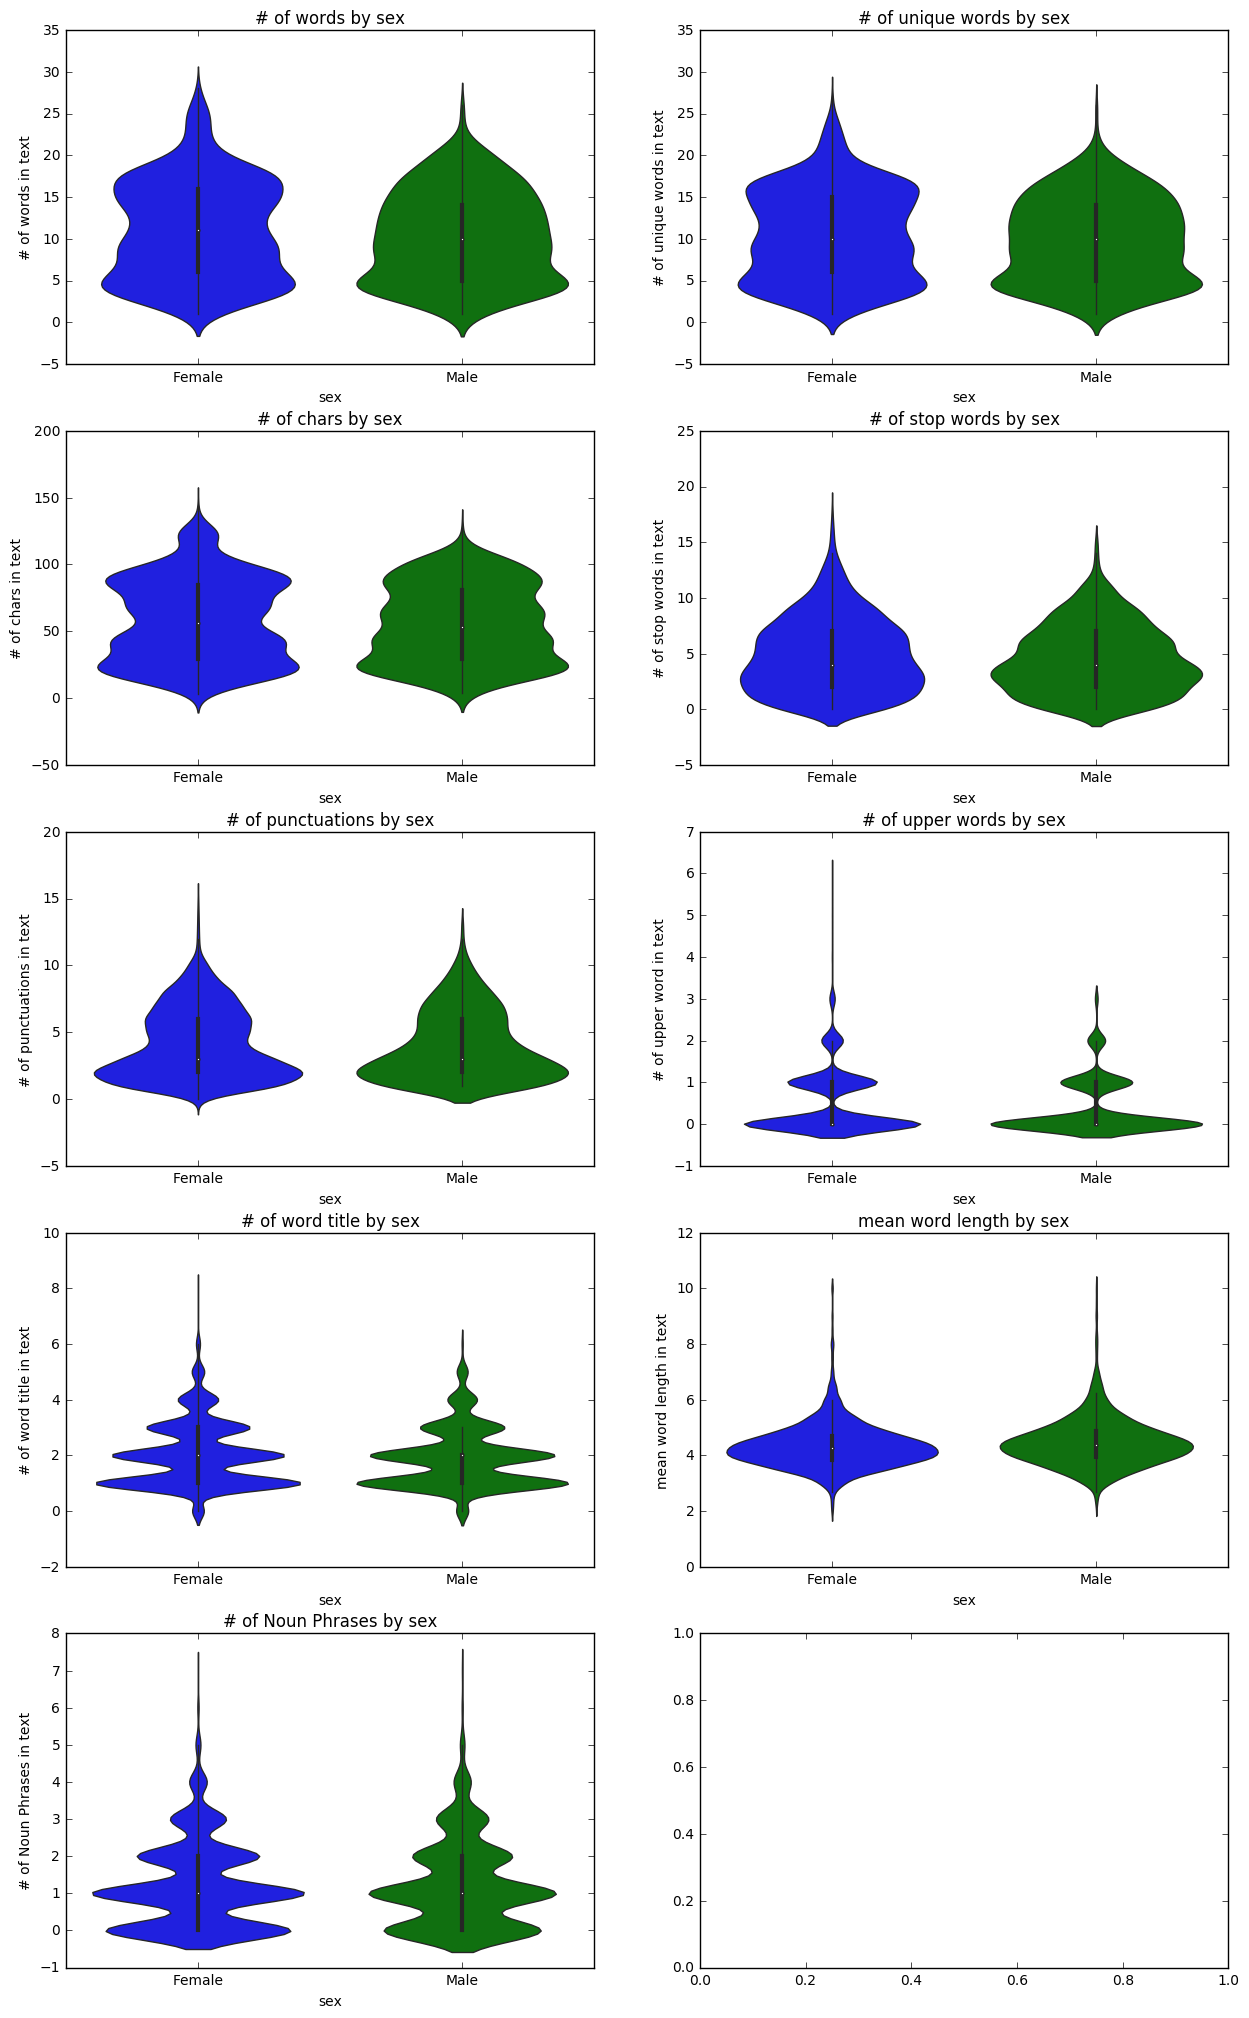

In [212]:


f, ax = plt.subplots(5,2, figsize=(15,25))

#df_speeches.loc[df_speeches.num_words>80,'num_words'] = 80 
sns.violinplot(x='sex', y='num_words', data=df_speeches , ax = ax[0,0] )
ax[0,0].set_xlabel("sex")
ax[0,0].set_ylabel("# of words in text")
ax[0,0].set_title('# of words by sex');

#df_speeches.loc[df_speeches['num_unique_words']>60, 'num_unique_words'] = 60 
sns.violinplot(x='sex', y='num_unique_words', data=df_speeches, ax = ax[0,1])
ax[0,1].set_xlabel("sex")
ax[0,1].set_ylabel("# of unique words in text")
ax[0,1].set_title('# of unique words by sex');

#df_speeches.loc[df_speeches['num_chars']>60, 'num_chars'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='num_chars', data=df_speeches, ax = ax[1,0])
ax[1,0].set_xlabel("sex")
ax[1,0].set_ylabel("# of chars in text")
ax[1,0].set_title('# of chars by sex');

#df_speeches.loc[df_speeches['num_unique_words']>30, 'num_unique_words'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='num_stopwords', data=df_speeches, ax = ax[1,1])
ax[1,1].set_xlabel("sex")
ax[1,1].set_ylabel("# of stop words in text")
ax[1,1].set_title('# of stop words by sex');

#df_speeches.loc[df_speeches['num_unique_words']>30, 'num_unique_words'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='num_punctuations', data=df_speeches, ax = ax[2,0])
ax[2,0].set_xlabel("sex")
ax[2,0].set_ylabel("# of punctuations in text")
ax[2,0].set_title('# of punctuations by sex');

#df_speeches.loc[df_speeches['num_unique_words']>30, 'num_unique_words'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='num_words_upper', data=df_speeches, ax = ax[2,1])
ax[2,1].set_xlabel("sex")
ax[2,1].set_ylabel("# of upper word in text")
ax[2,1].set_title('# of upper words by sex');
                                                                       
#df_speeches.loc[df_speeches['num_unique_words']>30, 'num_unique_words'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='num_words_title', data=df_speeches, ax = ax[3,0])
ax[3,0].set_xlabel("sex")
ax[3,0].set_ylabel("# of word title in text")
ax[3,0].set_title('# of word title by sex');

#df_speeches.loc[df_speeches['num_unique_words']>30, 'num_unique_words'] = 10 #truncation for better visuals
sns.violinplot(x='sex', y='mean_word_len', data=df_speeches, ax = ax[3,1])
ax[3,1].set_xlabel("sex")
ax[3,1].set_ylabel("mean word length in text")
ax[3,1].set_title('mean word length by sex');   

#df_speeches.loc[df_speeches['num_noun_phrases']>10, 'num_noun_phrases'] = 10 
sns.violinplot(x='sex', y='num_noun_phrases', data=df_speeches, ax = ax[4,0])
ax[4,0].set_xlabel("sex")
ax[4,0].set_ylabel("# of Noun Phrases in text")
ax[4,0].set_title('# of Noun Phrases by sex');

#### Simple train, test split and SVM

In [241]:
Y = df_speeches.sex.values
X = df_speeches.iloc[:,2:].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [254]:
svm = SVC()
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.662601626016


In [263]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print (rf.score(x_test, y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.634146341463


In [264]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print (gnb.score(x_test, y_test))

GaussianNB()

0.630081300813


#### from above classifier results, we can see tht SVM gives the better performance comparing to the other two. we don't expect to see the higher accuracy here, since the feature sets we used just include meta features and boxplots show there are not distinct variation between the male and female groups.

### Text based features

In [798]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
 


In [824]:
stemmer = nltk.stem.porter.PorterStemmer()
lemmer = nltk.stem.WordNetLemmatizer()
stop_words = stopwords.words('english') + list(punctuation)

# function is to customize tokenizer
# option 1: just remove punctuation, and separate words
# option 2:  remove punctuation, and separate words, stemming
# option 3:  remove punctuation, and separate words, lemmatization
def tokenize(text, option =3):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    if (option == 1):
        return [w.lower() for w in words if w not in stop_words and not w.isdigit()]
    if (option == 2):
        return stem_tokens([w.lower() for w in words if w not in stop_words and not w.isdigit()])
    else:
        return lem_tokens([w.lower() for w in words if w not in stop_words and not w.isdigit()])

#stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

#lemmatization
def lem_tokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

# build the vocabulary in one pass
for i in [1,2,3]:
    vocabulary = set()
    for setence in df_speeches['speech'].values.tolist():
        words = tokenize(setence,i)
        vocabulary.update(words)

    vocabulary = list(vocabulary)
    word_index = {w: idx for idx, w in enumerate(vocabulary)}

    VOCABULARY_SIZE = len(vocabulary)
    print('in all selected speeches, use option {}, there are {} unique vocabularies'.format(i, VOCABULARY_SIZE))


in all selected speeches, use option 1, there are 4021 unique vocabularies
in all selected speeches, use option 2, there are 3317 unique vocabularies
in all selected speeches, use option 3, there are 3707 unique vocabularies


In [833]:
### Fit transform the tfidf vectorizer ###
# this is the option to use default string tokenizer which uses the default token pattern '(?u)\b\w\w+\b'
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
speeches_tfidf = tfidf_vec.fit_transform(df_speeches['speech'].values.tolist())
print (speeches_tfidf.shape)

(2980, 21778)


In [834]:
tfidf_vec.get_feature_names()[:10]
speeches_tfidf.toarray()

['aaron',
 'aaron gone',
 'aaron gone compassionate',
 'aaron wherefore',
 'aaron wherefore look',
 'abbey',
 'abbey reverend',
 'abbey reverend abbot',
 'abbot',
 'abed']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [835]:
Y = df_speeches.sex.values
X = speeches_tfidf.toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

svm = SVC(C=1)
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.67581300813


In [828]:
### Fit transform the tfidf vectorizer ###
# this is the option to use our customized tokenizer
vocabulary = set()
for setence in df_speeches['speech'].values.tolist():
    words = tokenize(setence,3)
    vocabulary.update(words)

vocabulary = list(vocabulary)
tfidf_vec_mod = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocabulary, ngram_range=(1,3))
speeches_tfidf_lemma = tfidf_vec_mod.fit_transform(df_speeches['speech'].values.tolist())
print (speeches_tfidf_lemma.shape)

(2980, 3707)


In [829]:
Y = df_speeches.sex.values
X = speeches_tfidf_lemma.toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=102)

svm = SVC(C=1)
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.645325203252


#### in the above exploration, we used nltk functions to pre-process speech text. we tried three methods, default tfidf tokenizer, customized tokenizer, customized tokenizer with stemming, customized tokenizer with lemmatization. we found tht tfidf default tokenizer gives the best result. The reason could be that it provides more features than the rest methodes does. The size of the data set dominates the performance.

#### SVD

In [836]:
# we made comparison between # of components as 50, 100, 500
# looks like 100 gives better results
n_comp = 200
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(speeches_tfidf)
speeches_svd = pd.DataFrame(svd_obj.transform(speeches_tfidf))
print(speeches_svd.shape)

TruncatedSVD(algorithm='arpack', n_components=200, n_iter=5,
       random_state=None, tol=0.0)

(2980, 200)


In [837]:
speeches_svd.head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.002362,0.001700,0.001489,0.001352,0.000153,0.003990,0.000170,0.011338,0.001849,-0.002511,...,-0.003700,-0.008511,0.012033,0.024164,0.003927,0.010301,0.006194,0.000369,0.020221,0.033649
1,0.000027,0.000030,0.000167,0.000292,-0.000032,0.000879,-0.000392,0.001718,0.000962,-0.000188,...,0.007307,-0.012849,0.000924,0.020262,0.006973,0.011361,0.019573,0.002721,0.015129,0.016668
2,0.003004,0.002635,0.009069,0.008650,-0.000596,0.030142,-0.013888,0.040935,-0.003790,-0.013545,...,0.001266,0.009247,0.007616,-0.000912,-0.005346,0.012125,0.011368,-0.005120,0.010395,-0.002871
3,0.010297,0.006076,0.014936,0.027290,-0.004492,0.052550,-0.035360,0.173576,0.319387,0.007513,...,-0.000785,0.011354,0.020199,-0.004587,-0.004690,0.018359,-0.008818,0.007342,0.011311,-0.028828
4,0.000424,0.000243,0.003085,0.003507,0.000106,0.012420,-0.000246,0.011707,-0.009230,0.000632,...,0.038518,0.017654,-0.009070,0.007472,-0.001652,-0.000726,0.022018,0.002351,0.000030,-0.002340


In [838]:
# Percentage of variance explained by each of the selected components
#print(svd_obj.explained_variance_ratio_)  
# sum of all variance being explained by the selected components
print(svd_obj.explained_variance_ratio_.sum())  

0.234091144982


#### train test split and then apply SVM random forest

In [839]:
Y = df_speeches.sex.values
X = speeches_svd.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [840]:
# if we pick 50 components in LSI, we got:Prediction accuracy: 0.67581300813
# if we pick 100 components in LSI, we got: Prediction accuracy: 0.67581300813
# if we pick 500 components in LSI, we got: Prediction accuracy: 0.67581300813
svm = SVC()
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.67581300813


In [841]:
#  SVM linear kernel, if we pick 50 components in LSI, we got: Prediction accuracy: 0.676829268293
# SVM linear kernel, if we pick 100 components in LSI, we got: Prediction accuracy:   0.682926829268
# SVM linear kernel, if we pick 500 components in LSI, we got: Prediction accuracy: 0.67174796748
svm = SVC(C=10, kernel='linear')
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.70325203252


In [842]:
# if we pick 50 components in LSI, we got : accuracy 0.644308943089
# if we pick 100 components in LSI, we got : accuracy 0.650406504065
# if we pick 500 components in LSI, we got: accuracy 0.644308943089
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print (rf.score(x_test, y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.650406504065


#### more number of demensions for output data

In [307]:
n_comp = 1000
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(speeches_tfidf)
speeches_svd = pd.DataFrame(svd_obj.transform(speeches_tfidf))
print(speeches_svd.shape)

TruncatedSVD(algorithm='arpack', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

(2980, 1000)


In [309]:
Y = df_speeches.sex.values
X = speeches_svd.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

svm = SVC(C=100)
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.67581300813


#### in above steps, we explored the impact of number of selected components and choice of classifier. They all affect the final prediction accuracy. We use the function below to list them together and get better sense on which classifer and number of components are the best choice.

In [843]:
# function is to apply LSI latent senmentic indexing to the vector space and pick different number of components, then run SVM and RandomForrest
def LSI_and_classifiers(n_comp):
    svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
    svd_obj.fit(speeches_tfidf)
    speeches_svd = pd.DataFrame(svd_obj.transform(speeches_tfidf))
    explained_var_sum = svd_obj.explained_variance_ratio_.sum()
    
    Y = df_speeches.sex.values
    X = speeches_svd.values
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
    
    svm = SVC(C=10, kernel='linear')
    svm.fit(x_train, y_train)
    svm_scores = svm.score(x_test, y_test)
    
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    rf_scores = rf.score(x_test, y_test)
    
    return [explained_var_sum, svm_scores, rf_scores]
    

In [844]:
for n in [50, 100,200,300,500]:
    cur_list = LSI_and_classifiers(n)
    print("LSA pick {} components, explained {:.2f} variance, svm score is {:.4f}; random forrest score is {:.4f} \n".format(n, cur_list[0],cur_list[1], cur_list[2]))

LSA pick 50 components, explained 0.11 variance, svm score is 0.6768; random forrest score is 0.6433 

LSA pick 100 components, explained 0.16 variance, svm score is 0.6829; random forrest score is 0.6575 

LSA pick 200 components, explained 0.23 variance, svm score is 0.7033; random forrest score is 0.6392 

LSA pick 300 components, explained 0.29 variance, svm score is 0.6789; random forrest score is 0.6453 

LSA pick 500 components, explained 0.39 variance, svm score is 0.6717; random forrest score is 0.6433 



#### our test above shows we should pick # of components as 200 and SVM classifier for better results

In [845]:
# getting training and testset ready
svd_obj = TruncatedSVD(n_components=200, algorithm='arpack')
svd_obj.fit(speeches_tfidf)
speeches_svd = pd.DataFrame(svd_obj.transform(speeches_tfidf))
explained_var_sum = svd_obj.explained_variance_ratio_.sum()

Y = df_speeches.sex.values
X = speeches_svd.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

TruncatedSVD(algorithm='arpack', n_components=200, n_iter=5,
       random_state=None, tol=0.0)

In [846]:
# use grid search to find the best possible svm parameters
def apply_gridSearch(cur_X, cur_Y):
    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 500]}]

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
    clf.fit(cur_X, cur_Y)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print(clf.grid_scores_)


In [847]:
apply_gridSearch(X,Y)

Best parameters set found on development set:

{'C': 0.1, 'kernel': 'linear'}
[mean: 0.65369, std: 0.00041, params: {'C': 0.1, 'kernel': 'linear'}, mean: 0.64597, std: 0.00948, params: {'C': 1, 'kernel': 'linear'}, mean: 0.61409, std: 0.01510, params: {'C': 10, 'kernel': 'linear'}, mean: 0.59732, std: 0.00866, params: {'C': 100, 'kernel': 'linear'}, mean: 0.59497, std: 0.01387, params: {'C': 500, 'kernel': 'linear'}]


In [848]:
#svm = SVC(C=10, kernel='rbf', gamma = 0.001)
svm = SVC(C=0.1, kernel='linear')
svm.fit(x_train, y_train)
#predicted = svm.predict(x_test)
#accuracy = accuracy_score(y_test, predicted)
svm_best_scores = svm.score(x_test, y_test)
print('from our gridsearch result, the best accuracy score of SVM is {}'.format(svm_best_scores))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

from our gridsearch result, the best accuracy score of SVM is 0.6758130081300813


#### in above section, we applied LSA to the dataset and rerun the classifier. we also did the grid search on svm classifier to find the better parameters. the result is lower than what we got without doing LSA. It shows that keeping more features help the final result. 

#### word2vec

In [322]:
!pip install gensim

    100% |████████████████████████████████| 15.1MB 82kB/s  eta 0:00:01
  Running setup.py bdist_wheel for gensim ... done
  Stored in directory: /gpfs/fs01/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.cache/pip/wheels/a2/81/9e/37cdb84294955eb03e9b9898a0827fc80c4ce1cd19e6be096e
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /gpfs/fs01/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.cache/pip/wheels/b0/81/ad/856aade935fceaab491a800ec4de58edb8642afa4c4ba91a00
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /gpfs/fs01/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.cache/pip/wheels/31/9c/20/996d65ca104cbca940b1b053299b68459391c01c774d073126
Successfully built gensim smart-open bz2file


In [438]:
### Create tokenizer to tokenize each speech in the dataframe ###
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
 
stop_words = stopwords.words('english') + list(punctuation)
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]




In [467]:

word_tokenize(df_speeches['speech'][0])
tokenize(df_speeches['speech'][0])

['Dear',
 'Celia',
 ',',
 'I',
 'show',
 'more',
 'mirth',
 'than',
 'I',
 'am',
 'mistress',
 'of',
 ';',
 'and',
 'would',
 'you',
 'yet',
 'I',
 'were',
 'merrier',
 '?',
 'Unless',
 'you',
 'could',
 'teach',
 'me',
 'to',
 'forget',
 '...']

['dear',
 'celia',
 'show',
 'mirth',
 'mistress',
 'would',
 'yet',
 'merrier',
 'unless',
 'could',
 'teach',
 'forget',
 '...']

In [439]:
# build the vocabulary in one pass
vocabulary = set()
for setence in df_speeches['speech'].values.tolist():
    words = tokenize(setence)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
print(VOCABULARY_SIZE)


4021


In [468]:
df_speeches['speech_clean'] = df_speeches["speech"].apply(lambda x: tokenize(x))

In [492]:
import gensim
from gensim.models import Word2Vec
from gensim.models.doc2vec import LabeledSentence

#    size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
#    window: (default 5) The maximum distance between a target word and words around the target word.
#    min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
#    workers: (default 3) The number of threads to use while training.
#    sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

# we decided to use doc2vec instead of word2vec, since we are dealing with sentence classification in this problem
#model = Word2Vec(df_speeches['speech_clean'], size=200, window=5, min_count=2, workers=4)

In [849]:
sentences = [LabeledSentence(words=row['speech_clean'], tags=row['sex']) for index, row in df_speeches.iterrows() ]
sentences[1:10]

[LabeledSentence(words=['well', 'forget', 'condition', 'estate', 'rejoice'], tags='Female'),
 LabeledSentence(words=['henceforth', 'coz', 'devise', 'sports', 'let', 'see', 'think', 'falling', 'love'], tags='Female'),
 LabeledSentence(words=['shall', 'sport'], tags='Female'),
 LabeledSentence(words=['would', 'could', 'benefits', 'mightily', 'misplaced', 'bountiful', 'blind', 'woman', 'doth', 'mistake', '...'], tags='Female'),
 LabeledSentence(words=['nay', 'thou', 'goest', 'fortune', "'s", 'office', 'nature', "'s", 'fortune', 'reigns', 'gifts', 'world', 'lineaments', '...'], tags='Female'),
 LabeledSentence(words=['indeed', 'fortune', 'hard', 'nature', 'fortune', 'makes', 'nature', "'s", 'natural', 'cutter-off', 'nature', "'s", 'wit'], tags='Female'),
 LabeledSentence(words=['learned', 'oath', 'fool'], tags='Female'),
 LabeledSentence(words=['ay', 'marry', 'unmuzzle', 'wisdom'], tags='Female'),
 LabeledSentence(words=['mouth', 'full', 'news'], tags='Female')]

In [503]:
from gensim.models import Doc2Vec
#model = Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model = gensim.models.Doc2Vec(size=200, window=5, min_count=5, workers=11,alpha=0.025, min_alpha=0.025) # use fixed learning rate
model.build_vocab(sentences)
for epoch in range(10):
    model.train(sentences,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

123658

123534

123512

123584

123590

123488

123434

123576

123562

123582

In [768]:
model.vector_size

200

In [769]:
words = list(model.wv.vocab)
len(words)

462

In [770]:
w2v_X = model[model.wv.vocab]

In [771]:
w2v_X

array([[ 0.02048982,  0.031713  ,  0.03172522, ..., -0.04981145,
         0.05011789,  0.00527765],
       [ 0.05400589, -0.12294064,  0.03480659, ...,  0.10686822,
         0.0497832 ,  0.00312824],
       [ 0.04769491, -0.07035067,  0.05215737, ...,  0.05573874,
        -0.0006183 ,  0.02431409],
       ..., 
       [ 0.10708361, -0.09466611,  0.06075782, ...,  0.08835464,
         0.07843418,  0.01672721],
       [ 0.04531663, -0.04691113,  0.04758348, ...,  0.01822443,
         0.05339267,  0.00679734],
       [ 0.0155332 , -0.0631765 ,  0.03060624, ...,  0.0518002 ,
         0.04959867,  0.00710839]], dtype=float32)

### use vector for each word to calculate sentence vectors 

The average of all the word vectors in a sentence is used as sentence vector.

In [772]:
speeches_vec = []
for speech in df_speeches['speech_clean']:
    word_vec = []
    for word in speech:
        if word in words:
            #if np.isnan(w2v_X[words.index(word)]).all() == False:
            new_word_vec = w2v_X[words.index(word)]
            word_vec.append(new_word_vec)
        
    word_vec = np.array(word_vec).reshape(200,-1)
    speech_vec = np.nanmean(word_vec, axis=1)
    
    speeches_vec.append(speech_vec)

/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: Mean of empty slice


In [773]:
speeches_vec = np.array(speeches_vec)
speeches_vec = np.nan_to_num(speeches_vec)
speeches_vec.shape

(2980, 200)

#### use sentence vectors to perform classification

In [776]:
apply_gridSearch(X,Y)

Best parameters set found on development set:

{'C': 0.1, 'kernel': 'linear'}
[mean: 0.65369, std: 0.00041, params: {'C': 0.1, 'kernel': 'linear'}, mean: 0.65369, std: 0.00041, params: {'C': 1, 'kernel': 'linear'}, mean: 0.65369, std: 0.00041, params: {'C': 10, 'kernel': 'linear'}, mean: 0.64463, std: 0.00662, params: {'C': 100, 'kernel': 'linear'}, mean: 0.63322, std: 0.00815, params: {'C': 1000, 'kernel': 'linear'}]


In [783]:
Y = df_speeches.sex.values
X = speeches_vec
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

svm = SVC(C=0.001, kernel='linear')
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.677845528455


#### No improvement was found using sentence vector as predictor. Probably because the model we are using here is relatively simple.

### use both svd and sentence vecotor for classification

In [784]:
speeches_svd_vec = np.hstack((speeches_svd.values, speeches_vec))
speeches_svd_vec.shape

(2980, 400)

In [786]:
Y = df_speeches.sex.values
X = speeches_svd_vec
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

svm = SVC()
svm.fit(x_train, y_train)
svm_scores = svm.score(x_test, y_test)
print ('Prediction accuracy:', svm_scores)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction accuracy: 0.639227642276
